In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


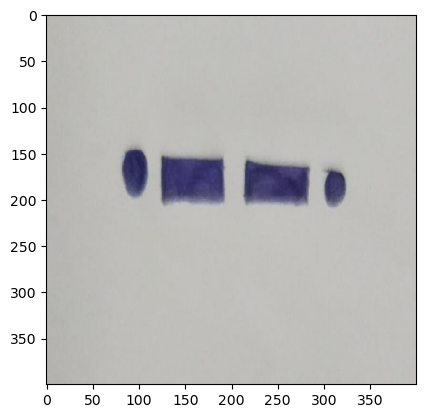

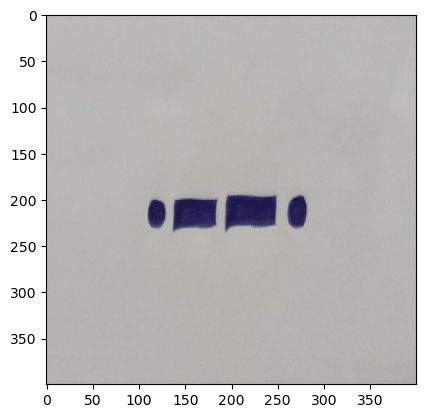

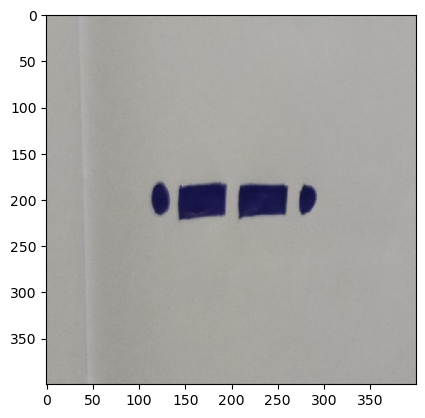

In [4]:
dir_path1 = 'ComputerVision/training/P'
j=0
for i in os.listdir(dir_path1):
  img = image.load_img(dir_path1 + '//' + i,target_size=(400,400))
  plt.imshow(img)
  plt.show()
  j+=1
  if(j==3):
    break

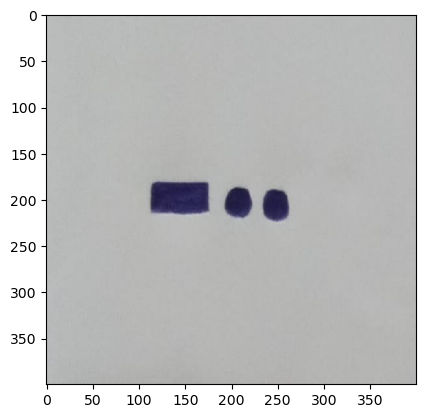

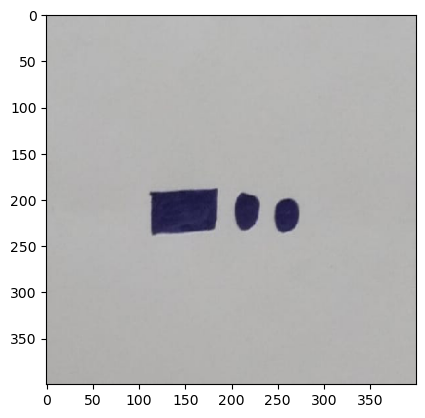

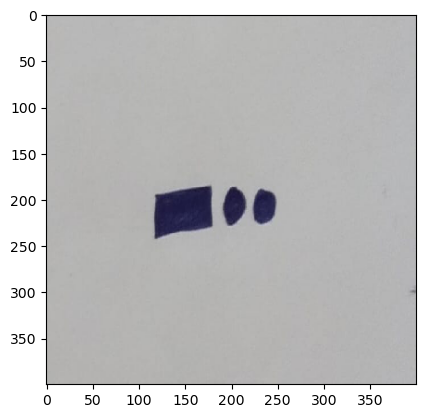

In [5]:
dir_path2 = 'ComputerVision/training/D'
j=0
for i in os.listdir(dir_path2):
  img = image.load_img(dir_path2 + '//' + i,target_size=(400,400))
  plt.imshow(img)
  plt.show()
  j+=1
  if(j==3):
    break

In [6]:
# dir_path3 = 'ComputerVision/training/K'

# for i in os.listdir(dir_path3):
#   img = image.load_img(dir_path3 + '//' + i,target_size=(400,400))
#   plt.imshow(img)
#   plt.show()

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)



In [8]:
train_dataset = train.flow_from_directory('ComputerVision1/training',
                                          target_size=(400,400),
                                          batch_size = 1,
                                          class_mode='categorical')


Found 64 images belonging to 5 classes.


In [9]:
validation_dataset = validation.flow_from_directory('ComputerVision1/validation',
                                                    target_size = (400,400),
                                                    batch_size = 1,
                                                    class_mode = 'categorical')

Found 64 images belonging to 5 classes.


In [10]:
train_dataset.class_indices

{'A': 0, 'J': 1, 'M': 2, 'Q': 3, 'U': 4}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [13]:
def policy_network():
  model = Sequential()
  model.add(Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)))
  
  model.add(Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(512,activation='relu'))
  model.add(Dense(5,activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model




In [14]:
model = policy_network()
model.fit(train_dataset,
          epochs = 15,
          validation_data = validation_dataset,
         shuffle = True)


Epoch 1/15
64/64 [==============================] - 26s 394ms/step - loss: 2.3333 - accuracy: 0.1719 - val_loss: 1.6061 - val_accuracy: 0.1875
Epoch 2/15
64/64 [==============================] - 27s 428ms/step - loss: 1.5956 - accuracy: 0.3281 - val_loss: 1.5341 - val_accuracy: 0.6406
Epoch 3/15
64/64 [==============================] - 30s 463ms/step - loss: 1.4502 - accuracy: 0.5312 - val_loss: 0.6344 - val_accuracy: 0.9062
Epoch 4/15
64/64 [==============================] - 26s 412ms/step - loss: 0.9792 - accuracy: 0.8281 - val_loss: 0.5069 - val_accuracy: 0.9062
Epoch 5/15
64/64 [==============================] - 26s 407ms/step - loss: 0.3967 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 6/15
64/64 [==============================] - 28s 432ms/step - loss: 0.0738 - accuracy: 0.9844 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/15
64/64 [==============================] - 26s 411ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000

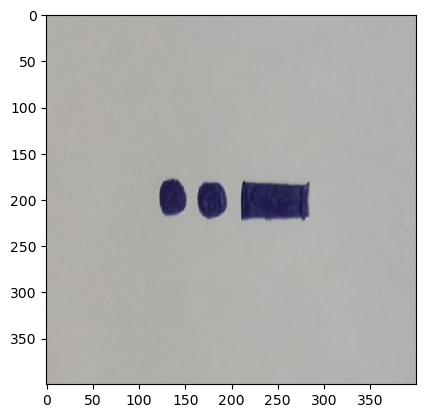

1/1 [==============================] - 0s 183ms/step
[0. 0. 0. 0. 1.]
Prediction : U


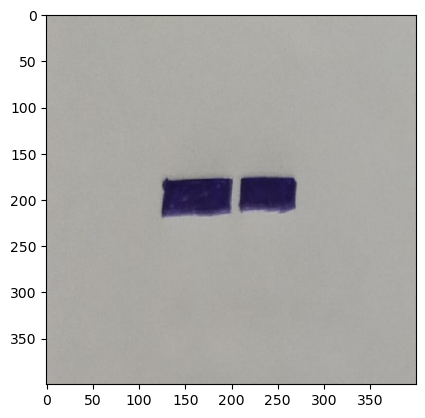

1/1 [==============================] - 0s 54ms/step
[0. 0. 1. 0. 0.]
Prediction : M


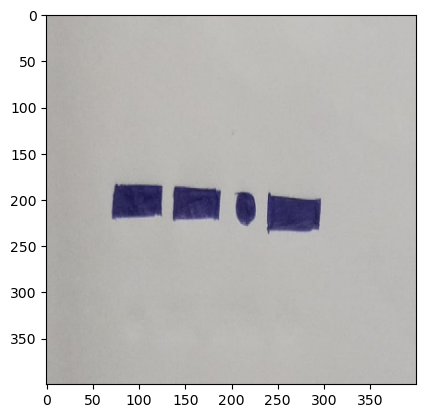

1/1 [==============================] - 0s 84ms/step
[0. 0. 0. 1. 0.]
Prediction : Q


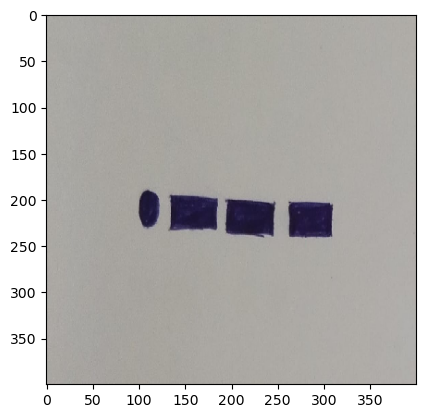

1/1 [==============================] - 0s 67ms/step
[0. 1. 0. 0. 0.]
Prediction : J


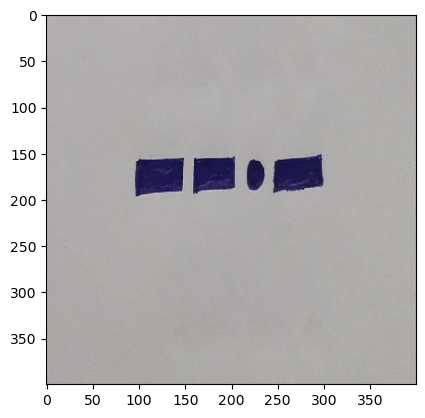

1/1 [==============================] - 0s 55ms/step
[0. 0. 0. 1. 0.]
Prediction : Q


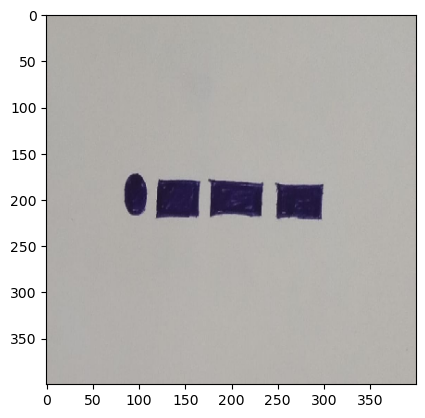

1/1 [==============================] - 0s 78ms/step
[0. 1. 0. 0. 0.]
Prediction : J


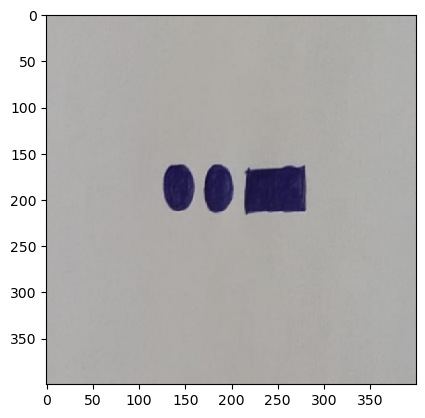

1/1 [==============================] - 0s 62ms/step
[0. 0. 0. 0. 1.]
Prediction : U


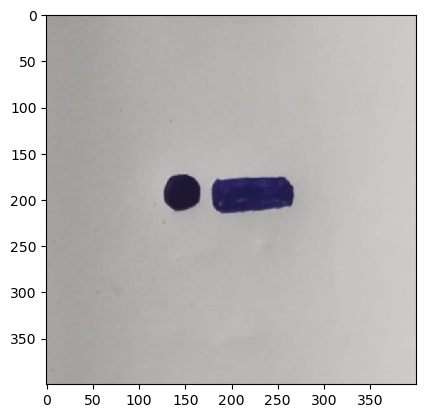

1/1 [==============================] - 0s 61ms/step
[1. 0. 0. 0. 0.]
Prediction : A


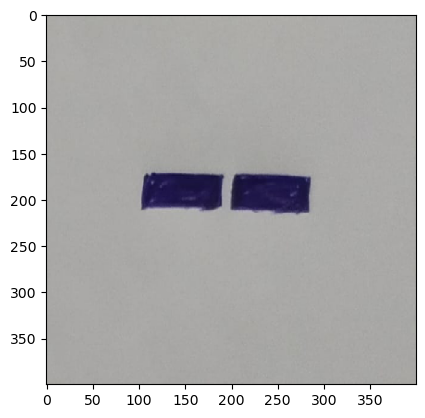

1/1 [==============================] - 0s 59ms/step
[0. 0. 1. 0. 0.]
Prediction : M


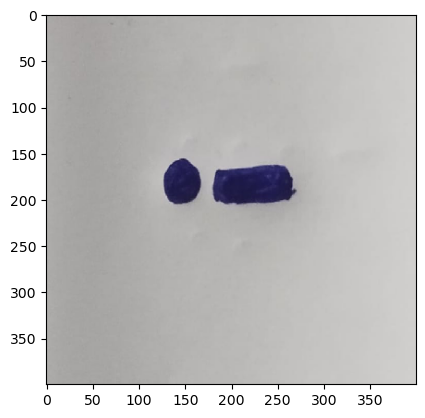

1/1 [==============================] - 0s 59ms/step
[1. 0. 0. 0. 0.]
Prediction : A


In [15]:
dir_path = 'ComputerVision1/testing/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i,target_size=(400,400))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  pred = model.predict(images)
  ans = pred[0]
  print(ans)
  
  for i in range(len(ans)):
    if(ans[i] == 1):
        if(i==0):
            print("Prediction : A")
        elif(i==1):
            print("Prediction : J")
        elif(i==2):
            print("Prediction : M")
        elif(i==3):
            print("Prediction : Q")
        elif(i==4):
            print("Prediction : U")
        



  